# Agent 4.0 - ML Models

Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
from reliability.Fitters import Fit_Weibull_2P

## Bottle estimation

In [3]:
bottle_data = pd.read_csv('Excell_reports/orders.csv')
bottle_data.head()

,Bottles,SetBlue,SetGreen,Add,Blue,Green,Free,Availability,Performance,Quality,OEE,Time,CalcOEE
0,10,5,5,0,5,4,1,83.6,58.9,90.0,44.4,06:21.8,44.35
1,20,10,10,0,10,8,2,83.6,70.5,90.0,53.1,NaN,53.06
2,30,15,15,0,15,13,2,83.6,79.8,93.3,62.3,NaN,62.27
3,40,20,20,0,20,17,3,83.6,80.4,92.5,62.2,NaN,62.15
4,50,25,25,0,25,20,5,83.6,82.8,90.0,62.3,NaN,62.31


In [6]:
corr_matrix_bottle = bottle_data.corr()
corr_matrix_bottle

,Bottles,SetBlue,SetGreen,Add,Blue,Green,Free,Availability,Performance,Quality,OEE,CalcOEE
Bottles,1.000000,1.000000,1.000000,0.282138,9.998416e-01,0.988353,0.924204,0.000000e+00,0.242335,0.680671,0.335460,0.491449
SetBlue,1.000000,1.000000,1.000000,0.282138,9.998416e-01,0.988353,0.924204,0.000000e+00,0.242335,0.680671,0.335460,0.491449
SetGreen,1.000000,1.000000,1.000000,0.282138,9.998416e-01,0.988353,0.924204,0.000000e+00,0.242335,0.680671,0.335460,0.491449
Add,0.282138,0.282138,0.282138,1.000000,2.832290e-01,0.417727,0.488389,1.609540e-01,0.484050,-0.013541,0.460449,0.512599
Blue,0.999842,0.999842,0.999842,0.283229,1.000000e+00,0.987901,0.925268,5.594282e-17,0.240661,0.676146,0.333159,0.488098
Green,0.988353,0.988353,0.988353,0.417727,9.879006e-01,1.000000,0.934957,2.534585e-02,0.306460,0.668024,0.394118,0.548764
Free,0.924204,0.924204,0.924204,0.488389,9.252684e-01,0.934957,1.000000,3.341581e-02,0.312537,0.413368,0.367002,0.521487
Availability,0.000000,0.000000,0.000000,0.160954,5.594282e-17,0.025346,0.033416,1.000000e+00,0.523149,-0.026490,0.107669,0.537480
Performance,0.242335,0.242335,0.242335,0.484050,2.406606e-01,0.306460,0.312537,5.231487e-01,1.000000,0.134444,0.897453,0.995269
Quality,0.680671,0.680671,0.680671,-0.013541,6.761462e-01,0.668024,0.413368,-2.648987e-02,0.134444,1.000000,0.268612,0.405546


<AxesSubplot:>

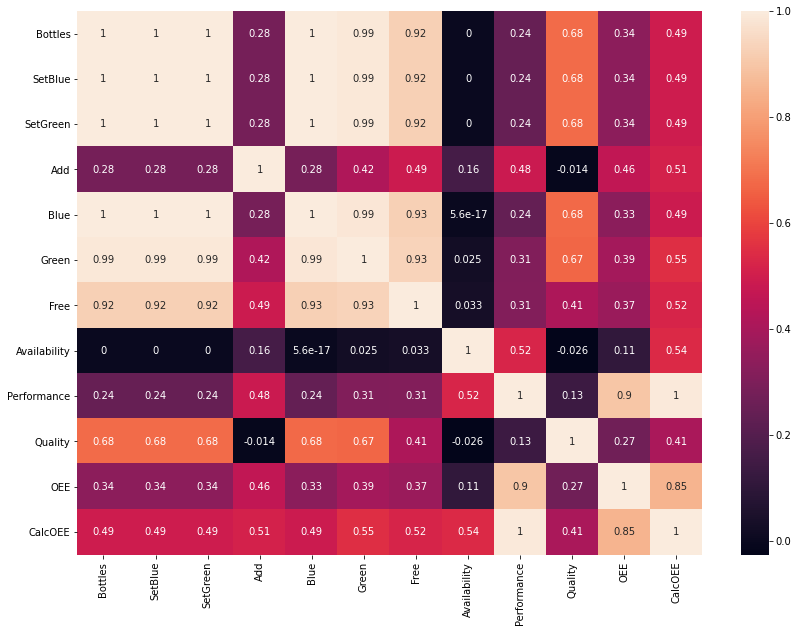

In [9]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix_bottle, xticklabels=corr_matrix_bottle.columns, yticklabels=corr_matrix_bottle.columns, annot=True)

In [127]:
x_train,x_test,y_train,y_test = train_test_split(bottle_data[['SetBlue','SetGreen']],bottle_data['Free'],test_size=0.15,random_state=0)

In [39]:
rf_bottles = RandomForestRegressor()
rf_bottles.fit(x_train,y_train)
rf_bottles_pred = rf_bottles.predict(x_test)
rf_bottles_pred

array([5.        , 6.35092208, 2.        , 1.        , 6.35092208,
       5.        , 4.23744669, 5.40753716, 7.4687528 , 4.        ,
       6.35092208, 3.38834976, 2.36066234, 2.        , 5.40753716])

In [40]:
df_plot_bottles =pd.DataFrame()
df_plot_bottles['SetBlue'] = x_test['SetBlue'].values
df_plot_bottles['SetGreen'] = x_test['SetGreen'].values
#df_plot_bottles['Performance'] = x_test['Performance'].values
df_plot_bottles['pred'] = rf_bottles_pred
df_plot_bottles['round(pred)'] = rf_bottles_pred.round()
#df_plot_bottles.sort_values(by=['Availability'],inplace=True)
df_plot_bottles

,SetBlue,SetGreen,pred,round(pred)
0,25,25,5.000000,5.0
1,50,50,6.350922,6.0
2,15,15,2.000000,2.0
3,5,5,1.000000,1.0
4,50,50,6.350922,6.0
5,25,25,5.000000,5.0
6,30,30,4.237447,4.0
7,40,40,5.407537,5.0
8,55,55,7.468753,7.0
9,35,35,4.000000,4.0


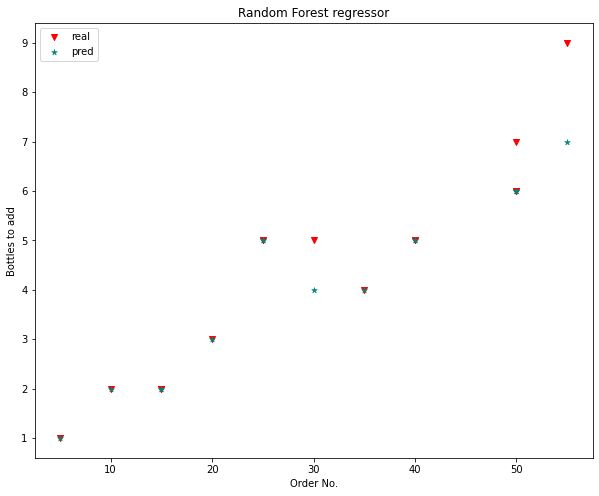

In [43]:
plt.figure(figsize=(10,8))
plt.scatter(x_test['SetBlue'],y_test,color='red',marker='v')
plt.scatter(df_plot_bottles['SetBlue'],df_plot_bottles['round(pred)'],color='#00857c',marker='*',linewidth=0.5)
plt.title('Random Forest regressor')
plt.xlabel("Order No.")
plt.ylabel("Bottles to add")
plt.legend(['real','pred'])
plt.show()

## Performance Estimation

In [49]:
x_train,x_test,y_train,y_test = train_test_split(bottle_data[['SetBlue','SetGreen','Availability','Add']],bottle_data['Performance'],test_size=0.15,random_state=0)

In [50]:
rf_performance = RandomForestRegressor()
rf_performance.fit(x_train,y_train)
rf_performance_pred = rf_performance.predict(x_test)
rf_performance_pred

array([67.0768    , 61.28913333, 72.648     , 61.51994762, 61.28913333,
       67.0768    , 90.36366667, 61.2       , 93.6641    , 69.21765801,
       89.7724    , 66.01363571, 61.83254286, 76.54      , 87.654     ])

In [52]:
df_plot_performance =pd.DataFrame()
df_plot_performance['SetBlue'] = x_test['SetBlue'].values
df_plot_performance['SetGreen'] = x_test['SetGreen'].values
df_plot_performance['Availability'] = x_test['Availability'].values
df_plot_performance['Add'] = x_test['Add'].values
df_plot_performance['pred'] = rf_performance_pred
#df_plot_performance.sort_values(by=['Availability'],inplace=True)
df_plot_performance

,SetBlue,SetGreen,Availability,Add,pred
0,25,25,83.0,0,67.076800
1,50,50,83.0,0,61.289133
2,15,15,83.6,0,72.648000
3,5,5,83.0,0,61.519948
4,50,50,83.0,0,61.289133
5,25,25,83.0,0,67.076800
6,30,30,83.6,5,90.363667
7,40,40,83.0,0,61.200000
8,55,55,83.0,10,93.664100
9,35,35,83.0,0,69.217658


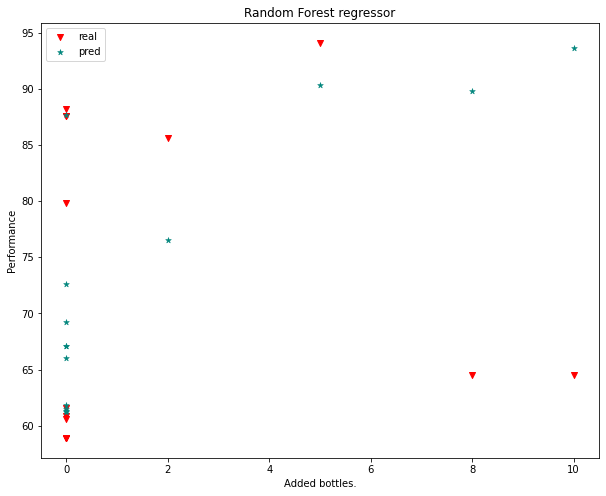

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(x_test['Add'],y_test,color='red',marker='v')
plt.scatter(df_plot_performance['Add'],df_plot_performance['pred'],color='#00857c',marker='*',linewidth=0.5)
plt.title('Random Forest regressor')
plt.xlabel("Added bottles.")
plt.ylabel("Performance")
plt.legend(['real','pred'])
plt.show()

## Failure prediction

In [74]:
df_mf = pd.read_csv("Excell_reports/failure_machines_analysis19mar2021.csv")
df_mf.head()

,time,M1_failure,M2_failure,M3_failure,M4_failure
0,3600,0,0,0,0
1,7200,0,0,0,0
2,10800,0,0,0,0
3,14400,0,0,0,0
4,18000,0,0,0,0


In [75]:
df_mf['time']=df_mf['time']/3600
df_mf

,time,M1_failure,M2_failure,M3_failure,M4_failure
0,1.0,0,0,0,0
1,2.0,0,0,0,0
2,3.0,0,0,0,0
3,4.0,0,0,0,0
4,5.0,0,0,0,0
...,...,...,...,...,...
474,475.0,0,0,0,0
475,476.0,0,0,0,0
476,477.0,0,0,1,0
477,478.0,0,0,0,0


In [60]:
def get_failure_times_M1(row):
    idx = row.name
    if row['M1_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M1_failure'].iloc[idx+1] == 1:
            return row['time']
        else:
            return 0
    else:
        return 0
def get_failure_times_M2(row):
    idx = row.name
    if row['M2_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M2_failure'].iloc[idx+1] == 1:
            return row['time']
        else:
            return 0
    else:
        return 0
def get_failure_times_M3(row):
    idx = row.name
    if row['M3_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M3_failure'].iloc[idx+1] == 1:
            return row['time']
        else:
            return 0
    else:
        return 0
    
def get_failure_times_M4(row):
    idx = row.name
    if row['M4_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M4_failure'].iloc[idx+1] == 1:
            return row['time']
        else:
            return 0
    else:
        return 0
    
def get_lost_time_M1(row):
    idx=row.name
    j=0
    total_time = 0
    if row['M1_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M1_failure'].iloc[idx+1] == 1:
            while df_mf['M1_failure'].iloc[idx+j+1]==1:
                if (idx+j+2) >= df_mf.shape[0]:
                    break
                total_time = total_time + 1
                j=j+1
            j=0                
            return total_time
        else:
            return 0
    else:
        return 0
def get_lost_time_M2(row):
    idx=row.name
    j=0
    total_time = 0
    if row['M2_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M2_failure'].iloc[idx+1] == 1:
            while df_mf['M2_failure'].iloc[idx+j+1]==1:
                if (idx+j+2) >= df_mf.shape[0]:
                    break
                total_time = total_time + 1
                j=j+1
            j=0                
            return total_time
        else:
            return 0
    else:
        return 0  

def get_lost_time_M3(row):
    idx=row.name
    j=0
    total_time = 0
    if row['M3_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M3_failure'].iloc[idx+1] == 1:
            while df_mf['M3_failure'].iloc[idx+j+1]==1:
                if (idx+j+2) >= df_mf.shape[0]:
                    break
                total_time = total_time + 1
                j=j+1
            j=0                
            return total_time
        else:
            return 0
    else:
        return 0
def get_lost_time_M4(row):
    idx=row.name
    j=0
    total_time = 0
    if row['M4_failure']==0 and idx < df_mf.shape[0]-1:
        if df_mf['M4_failure'].iloc[idx+1] == 1:
            while df_mf['M4_failure'].iloc[idx+j+1]==1:
                if (idx+j+2) >= df_mf.shape[0]:
                    break
                total_time = total_time + 1
                j=j+1
            j=0                
            return total_time
        else:
            return 0
    else:
        return 0  

In [76]:
df_time_M1 = df_mf.apply(get_lost_time_M1,axis=1)
df_time_M1[df_time_M1>0]

10     7
199    2
217    2
250    4
259    3
dtype: int64

In [62]:
df_transf_M1 = df_mf.apply(get_failure_times_M1,axis=1)
df_transf_M1[df_transf_M1>0]

10      11.0
199    200.0
217    218.0
250    251.0
259    260.0
dtype: float64

In [63]:
df_M1 = pd.DataFrame()
df_M1['failure_time'] = df_transf_M1[df_transf_M1>0].values
df_M1['lost_production_time'] = df_time_M1[df_time_M1>0].values
df_M1.head()

,failure_time,lost_production_time
0,11.0,7
1,200.0,2
2,218.0,2
3,251.0,4
4,260.0,3


In [64]:
df_time_M2 = df_mf.apply(get_lost_time_M2,axis=1)
df_time_M2[df_time_M2>0]

18     1
20     5
119    2
152    1
204    3
229    3
243    1
351    2
362    1
426    3
442    2
455    1
468    1
dtype: int64

In [65]:
df_transf_M2 = df_mf.apply(get_failure_times_M2,axis=1)
df_transf_M2[df_transf_M2>0]

18      19.0
20      21.0
119    120.0
152    153.0
204    205.0
229    230.0
243    244.0
351    352.0
362    363.0
426    427.0
442    443.0
455    456.0
468    469.0
dtype: float64

In [66]:
df_M2 = pd.DataFrame()
df_M2['failure_time'] = df_transf_M2[df_transf_M2>0].values
df_M2['lost_production_time'] = df_time_M2[df_time_M2>0].values
df_M2.head()

,failure_time,lost_production_time
0,19.0,1
1,21.0,5
2,120.0,2
3,153.0,1
4,205.0,3


In [67]:
df_time_M3 = df_mf.apply(get_lost_time_M3,axis=1)
df_transf_M3 = df_mf.apply(get_failure_times_M3,axis=1)
df_M3 = pd.DataFrame()
df_M3['failure_time'] = df_transf_M3[df_transf_M3>0].values
df_M3['lost_production_time'] = df_time_M3[df_time_M3>0].values
df_M3.head()

,failure_time,lost_production_time
0,22.0,2
1,37.0,1
2,64.0,1
3,68.0,1
4,84.0,2


In [68]:
df_time_M4 = df_mf.apply(get_lost_time_M4,axis=1)
df_transf_M4 = df_mf.apply(get_failure_times_M4,axis=1)
df_M4 = pd.DataFrame()
df_M4['failure_time'] = df_transf_M4[df_transf_M4>0].values
df_M4['lost_production_time'] = df_time_M4[df_time_M4>0].values
df_M4.head()

,failure_time,lost_production_time
0,8.0,1
1,74.0,1
2,79.0,1
3,100.0,2
4,111.0,1


In [82]:
df_M1

,failure_time,lost_production_time
0,11.0,7
1,200.0,2
2,218.0,2
3,251.0,4
4,260.0,3


In [88]:
x_train_M1,x_test_M1,y_train_M1,y_test_M1 = train_test_split(df_M1[['failure_time']],df_M1['lost_production_time'],test_size=0.20,random_state=0)
x_train_M2,x_test_M2,y_train_M2,y_test_M2 = train_test_split(df_M2[['failure_time']],df_M2['lost_production_time'],test_size=0.20,random_state=0)
x_train_M3,x_test_M3,y_train_M3,y_test_M3 = train_test_split(df_M3[['failure_time']],df_M3['lost_production_time'],test_size=0.20,random_state=0)
x_train_M4,x_test_M4,y_train_M4,y_test_M4 = train_test_split(df_M4[['failure_time']],df_M4['lost_production_time'],test_size=0.20,random_state=0)

In [90]:
x_train_M1,x_test_M1,y_train_M1,y_test_M1

(   failure_time
 0          11.0
 1         200.0
 3         251.0
 4         260.0,
    failure_time
 2         218.0,
 0    7
 1    2
 3    4
 4    3
 Name: lost_production_time, dtype: int64,
 2    2
 Name: lost_production_time, dtype: int64)

In [91]:
rf_M1 = RandomForestRegressor()
rf_M1.fit(x_train_M1,y_train_M1)
rf_predictions_test_M1 = rf_M1.predict(x_test_M1)
rf_predictions_test_M1

array([2.4])

In [92]:
rf_M2 = RandomForestRegressor()
rf_M2.fit(x_train_M2,y_train_M2)
rf_predictions_test_M2 = rf_M2.predict(x_test_M2)
rf_predictions_test_M2

array([2.42, 1.76, 2.46])

In [93]:
rf_M3 = RandomForestRegressor()
rf_M3.fit(x_train_M3,y_train_M3)
rf_predictions_test_M3 = rf_M3.predict(x_test_M3)
rf_predictions_test_M3

array([1.29, 1.78, 1.29, 1.09])

In [94]:
rf_M4 = RandomForestRegressor()
rf_M4.fit(x_train_M4,y_train_M4)
rf_predictions_test_M4 = rf_M4.predict(x_test_M4)
rf_predictions_test_M4

array([1.69, 2.18, 1.22])

In [95]:
df_plot_M1_rf =pd.DataFrame()
df_plot_M1_rf['failure_time'] = x_test_M1['failure_time'].values
df_plot_M1_rf['pred'] = rf_predictions_test_M1
df_plot_M1_rf.sort_values(by=['failure_time'],inplace=True)
df_plot_M1_rf

,failure_time,pred
0,218.0,2.4


In [96]:
df_plot_M2_rf =pd.DataFrame()
df_plot_M2_rf['failure_time'] = x_test_M2['failure_time'].values
df_plot_M2_rf['pred'] = rf_predictions_test_M2
df_plot_M2_rf.sort_values(by=['failure_time'],inplace=True)
df_plot_M2_rf

,failure_time,pred
2,205.0,2.46
0,244.0,2.42
1,456.0,1.76


In [97]:
df_plot_M3_rf =pd.DataFrame()
df_plot_M3_rf['failure_time'] = x_test_M3['failure_time'].values
df_plot_M3_rf['pred'] = rf_predictions_test_M3
df_plot_M3_rf.sort_values(by=['failure_time'],inplace=True)
df_plot_M3_rf

,failure_time,pred
1,37.0,1.78
3,124.0,1.09
0,462.0,1.29
2,476.0,1.29


In [98]:
df_plot_M4_rf =pd.DataFrame()
df_plot_M4_rf['failure_time'] = x_test_M4['failure_time'].values
df_plot_M4_rf['pred'] = rf_predictions_test_M4
df_plot_M4_rf.sort_values(by=['failure_time'],inplace=True)
df_plot_M4_rf

,failure_time,pred
2,79.0,1.22
0,111.0,1.69
1,267.0,2.18


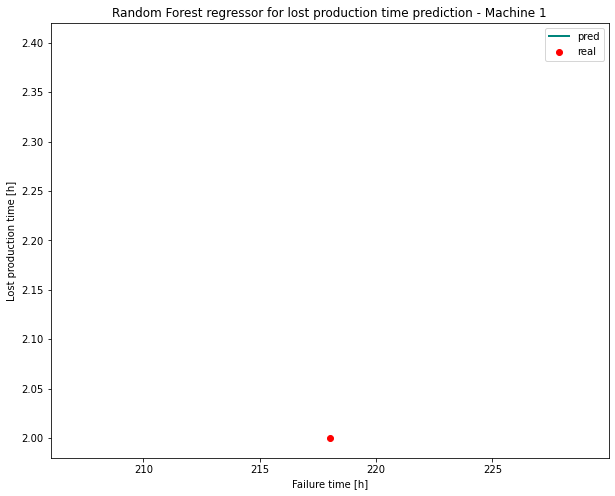

In [103]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_M1,y_test_M1,color='red')
plt.plot(df_plot_M1_rf['failure_time'],df_plot_M1_rf['pred'],color='#00857c',linewidth=2)
plt.title('Random Forest regressor for lost production time prediction - Machine 1')
plt.xlabel("Failure time [h]")
plt.ylabel("Lost production time [h]")
plt.legend(['pred','real'])
plt.show()

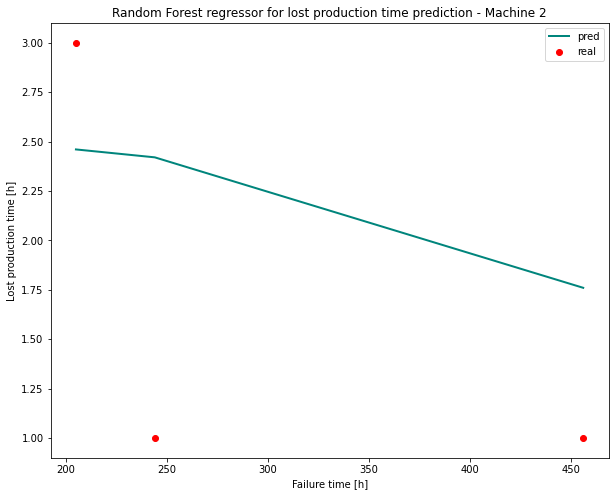

In [104]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_M2,y_test_M2,color='red')
plt.plot(df_plot_M2_rf['failure_time'],df_plot_M2_rf['pred'],color='#00857c',linewidth=2)
plt.title('Random Forest regressor for lost production time prediction - Machine 2')
plt.xlabel("Failure time [h]")
plt.ylabel("Lost production time [h]")
plt.legend(['pred','real'])
plt.show()

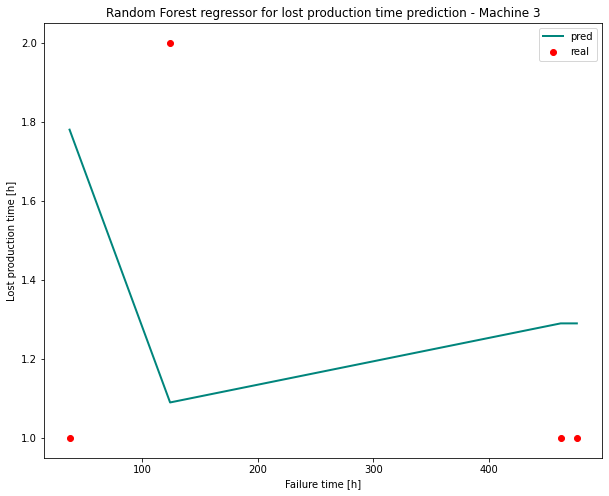

In [105]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_M3,y_test_M3,color='red')
plt.plot(df_plot_M3_rf['failure_time'],df_plot_M3_rf['pred'],color='#00857c',linewidth=2)
plt.title('Random Forest regressor for lost production time prediction - Machine 3')
plt.xlabel("Failure time [h]")
plt.ylabel("Lost production time [h]")
plt.legend(['pred','real'])
plt.show()

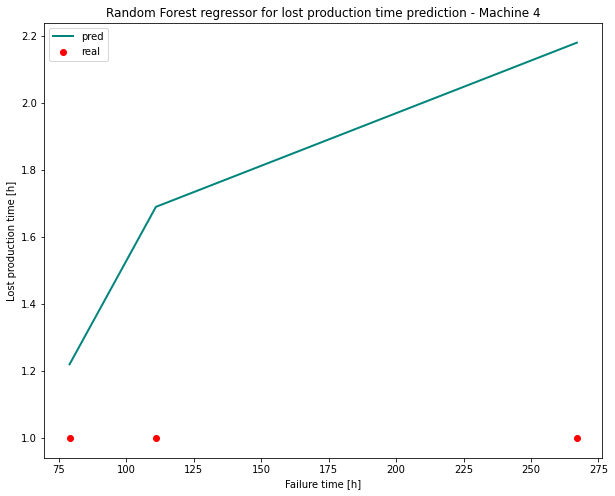

In [106]:
plt.figure(figsize=(10,8))
plt.scatter(x_test_M4,y_test_M4,color='red')
plt.plot(df_plot_M4_rf['failure_time'],df_plot_M4_rf['pred'],color='#00857c',linewidth=2)
plt.title('Random Forest regressor for lost production time prediction - Machine 4')
plt.xlabel("Failure time [h]")
plt.ylabel("Lost production time [h]")
plt.legend(['pred','real'])
plt.show()

## Saving models into files

In [110]:
rf_bottles_filename = 'bottle_estimation_model.sav'
pickle.dump(rf_bottles, open(rf_bottles_filename, 'wb'))
rf_performance_filename = 'performance_estimation_model.sav'
pickle.dump(rf_performance, open(rf_performance_filename, 'wb'))
rf_failureM1_filename = 'failure_estimation_model_M1.sav'
pickle.dump(rf_M1, open(rf_failureM1_filename, 'wb'))
rf_failureM2_filename = 'failure_estimation_model_M2.sav'
pickle.dump(rf_M2, open(rf_failureM2_filename, 'wb'))
rf_failureM3_filename = 'failure_estimation_model_M3.sav'
pickle.dump(rf_M3, open(rf_failureM3_filename, 'wb'))
rf_failureM4_filename = 'failure_estimation_model_M4.sav'
pickle.dump(rf_M4, open(rf_failureM4_filename, 'wb'))

## Failure probability

### Loading models
(If necessary)

In [113]:
loaded_model = pickle.load(open('performance_estimation_model.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
result

-0.2488916516894446

In [125]:
t_array = np.array([5,5])
t_array

array([5, 5])

In [134]:
t_df = pd.DataFrame(data={'1':[5],'2':[5]})
t_df

,1,2
0,5,5


In [135]:
rf_bottles.predict(pd.DataFrame(t_df))

array([1.])

In [128]:
x_test

,SetBlue,SetGreen
26,25,25
86,50,50
2,15,15
55,5,5
75,50,50
92,25,25
16,30,30
73,40,40
54,55,55
94,35,35
